# The notebook is for using the flagellar assembly genes of Ecoli as the origin species and understand how I redesign it to have other flagellation pattern
<body>
Comparison of the Ecoli COG pairs in flagella with other species. The criteria are - 
<ol>
<li> Patristic distance </li>
<li> Number of COG assigned genes </li>
<li> Number of conserved ordered COG pair </li>
<li> Number of unique COG pair in eco </li>
<li> Number of unique COG pair in other organism </li>
</ol>
</body>
***

In [1]:
import os
import cPickle as pickle

def loadPkl(fname):
    pklDir = '/home/jaggu/research/projectFiles/operons/pklFiles'
    f = os.path.join(pklDir,fname)
    db = pickle.load(open(f))
    return db

def savePkl(db,pklFname):
    pklPath = '/home/jaggu/research/projectFiles/operons/pklFiles'
    f = os.path.join(pklPath,pklFname)
    pickle.dump(db,open(f,'w'))
    return 

org_FlagellaPairs_dict = loadPkl('selected_org.flagellaCOGPairs.dict.pkl')
eco_org2_dist = loadPkl('eco_org2_dist.dict.pkl')

orgDict_orig = {'vch': ('Vibrio_cholerae_O1_biovar_El_Tor_N16961_uid57623','NC_002505'),
           'pae': ('Pseudomonas_aeruginosa_PAO1_uid57945','NC_002516'),
           'hpg': ('Helicobacter_pylori_G27_uid59305','NC_011333'),
           'vfi': ('Vibrio_fischeri_ES114_uid58163','NC_006840'),
           'eco': ('Escherichia_coli_K_12_substr__MG1655_uid57779','NC_000913'),
           'seo': ('Salmonella_enterica_serovar_Typhimurium_LT2_uid57799','NC_003197'),
           'bsu': ('Bacillus_subtilis_168_uid57675','NC_000964'),
           'cjj': ('Campylobacter_jejuni_81_176_uid58503','NC_008787'),
           'rru': ('Rhodospirillum_rubrum_ATCC_11170_uid57655','NC_007643'),
           'bbu': ('Borrelia_burgdorferi_B31_uid57581','NC_001318'),
           'bhy': ('Brachyspira_hyodysenteriae_WA1_uid59291','NC_012225')
          }

orgDict_ForDist = {'vch': ('Vibrio_cholerae_O1_biovar_El_Tor_N16961_uid57623','NC_002505'),
           'pae': ('Pseudomonas_aeruginosa_PAO1_uid57945','NC_002516'),
           'hpg': ('Helicobacter_pylori_G27_uid59305','NC_011333'),
           'vfi': ('Aliivibrio_fischeri_ES114','NC_006840'), #This will not match with NCBI genomes; 
           'eco': ('Escherichia_coli_K_12_substr__MG1655_uid57779','NC_000913'),
           'seo': ('Salmonella_enterica_serovar_Typhimurium_LT2_uid57799','NC_003197'),
           'bsu': ('Bacillus_subtilis_168_uid57675','NC_000964'),
           'cjj': ('Campylobacter_jejuni_81_176_uid58503','NC_008787'),
           'rru': ('Rhodospirillum_rubrum_ATCC_11170_uid57655','NC_007643'),
           'bbu': ('Borrelia_afzelii_FLI','NC_001318'), # This will not match NCBI genome
           'bhy': ('Brachyspira_hyodysenteriae_WA1_uid59291','NC_012225')
          }

orgList_ordered = ('eco','seo','bsu','vch','pae','hpg','vfi','cjj','rru','bbu','bhy')
nbrOrgs = len(orgList_ordered)

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def arrayFigure(array,axm):
    cax = axm.matshow(array,interpolation='nearest', cmap='Blues')
    axm.set_adjustable('box-forced')
    axm.set_xticks([])
    axm.set_yticks(range(nbrOrgs),minor=False)
    axm.set_yticklabels(orgList_ordered)
    return axm

In [3]:
""" 1. Calculating patristic distance array (eco vs the rest) """
dist_array = np.zeros((nbrOrgs,1),dtype=float)
for i, org in enumerate(orgList_ordered):
    orgName = orgDict_ForDist[org][0]
    oname = orgName.split('_')[0]+'_'+orgName.split('_')[1]
    dist_array[i] = eco_org2_dist[oname]
print "Array of patristic distance calculated : ",np.transpose(dist_array)
#fig,ax = plt.subplots()
#axDist = arrayFigure(dist_array,ax)

Array of patristic distance calculated :  [[ 0.       0.03106  0.72893  0.36371  0.47345  0.77804  0.34088  0.80757
   0.58531  0.74799  0.71409]]


In [4]:
""" 2. Calculating the number of flagellar COG genes (not pairs) assigned for each organism """

nbrGenes_array = np.zeros((nbrOrgs,1),dtype=int)

for i, org in enumerate(orgList_ordered):
    allCOGs = list()
    allPairs = org_FlagellaPairs_dict[org]
    for cog1,cog2 in allPairs:
        allCOGs.append(cog1)
        allCOGs.append(cog2)
    nbrGenes_array[i] = len(set(allCOGs))

print "Array of number of Genes calculated : ",np.transpose(nbrGenes_array)
#fig,ax = plt.subplots()
#ax = arrayFigure(nbrGenes_array,ax)

Array of number of Genes calculated :  [[38 40 37 43 46 45 42 47 37 25 37]]


In [5]:
""" 3. Calculating the number of flagellar COG gene pairs (including COG unassigned) intersecting 
for each organism """

# Score between number of COG pairs between the two organisms. 
def intersect(a,b):
    return list(set(a)&set(b))

intersectPairs_array = np.zeros((nbrOrgs,1),dtype=int)
ecoPairs = org_FlagellaPairs_dict['eco']

for i, org in enumerate(orgList_ordered):
    allPairs = org_FlagellaPairs_dict[org]
    nbrIntersect = len(intersect(ecoPairs,allPairs))
    intersectPairs_array[i] = nbrIntersect

print "Array of number of pairs interesecting (including unassigned) : ",np.transpose(intersectPairs_array)
#fig,ax = plt.subplots()
#ax = arrayFigure(intersectPairs_array,ax)

Array of number of pairs interesecting (including unassigned) :  [[33 32 14 22 23  7 22  7 10 11 12]]


In [6]:
""" 4. Calculating the number of flagellar COG gene pairs (including unassigned COG) present in eco but not in 
other species """

ecoPresent_array = np.zeros((nbrOrgs,1),dtype=int)
ecoPairs = org_FlagellaPairs_dict['eco']

for i, org in enumerate(orgList_ordered):
    allPairs = org_FlagellaPairs_dict[org]
    intersectList = intersect(ecoPairs,allPairs)
    ecoSet = set(ecoPairs) - set(intersectList)
    ecoPresent_array[i] = len(ecoSet)

print "Array of number of pairs present in eco but not in other organism : ",np.transpose(ecoPresent_array)
#fig,ax = plt.subplots()
#ax = arrayFigure(ecoPresent_array,ax)

Array of number of pairs present in eco but not in other organism :  [[ 0  1 19 11 10 26 11 26 23 22 21]]


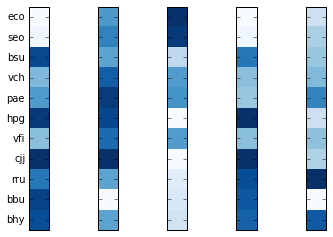

In [46]:
# Combining the different arrays into one. Probably have to combine different axes

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=1,ncols=5,sharey=True)
ax1 = arrayFigure(dist_array,ax1)
ax2 = arrayFigure(nbrGenes_array,ax2)
ax3 = arrayFigure(intersectPairs_array,ax3)
ax4 = arrayFigure(ecoPresent_array,ax4)
ax5 = arrayFigure(clusterSize_array,ax5) #It calls a variable later in the notebook

# Saving figure
imgDir = '/home/jaggu/research/projectFiles/operons/tmpFigures'
fname = 'eco_compareFeatures.heatmap.svg'
f = os.path.join(imgDir,fname)
plt.savefig(f,dpi=300)

*** 
# Graphing the operonic structure for each of the organisms
<body>
Although the network overlay is intuitive, I am finding it hard to visualize it. I am thinking of graphing the gene position on the genome for each organisms. This will take a lot of effort and playing with image tools of matplotlib, but should be doable. I am hoping to color the COG groups in the same scheme I used earlier. 
</body>

In [8]:
# Defining color for the COG groups (maybe later)
cog_func_list = [('COG1345','K02407','CAP','fliD'),
                 ('COG1344','K02397','HOOK ASSOCIATED','flgL'),
                 ('COG1256','K02396','HOOK ASSOCIATED','flgK'),
                 ('COG1344','K02406','FILAMENT','fliC'),
                 ('COG3144','K02414','HOOK','fliK'),
                 ('COG1843','K02389','HOOK','flgD'),
                 ('COG1749','K02392','DISTAL RING','flgG'),
                 ('COG2063','K02393','L RING','flgH'),
                 ('COG1749','K02391','P ROD','flgF'),
                 ('COG1706','K02394','P RING','flgI'),
                 ('COG1677','K02408','P ROD','fliE'),
                 ('COG1815','K02387','P ROD','flgB'),
                 ('COG1558','K02388','P ROD','flgC'),
                 ('COG1749','K02390','HOOK','flgE'),                 
                 ('COG1766','K02409','MS RING','fliF'),
                 ('COG1536','K02410','C RING','fliG'),
                 ('COG1868','K02416','C RING','fliM'),
                 ('COG1886','K02417','C RING','fliN'),
                 ('COG1360','K02557','MOTOR','motB'),
                 ('COG1291','K02556','MOTOR','motA'),
                 ('COG1298','K02400','TYPE III SS','flhA'),
                 ('COG1377','K02401','TYPE III SS','flhB'),
                 ('COG1317','K02411','TYPE III SS','fliH'),
                 ('COG1157','K02412','TYPE III SS','fliI'),
                 ('COG3190','K02418','TYPE III SS','fliO'),
                 ('COG1987','K02420','TYPE III SS','fliQ'),
                 ('COG1338','K02419','TYPE III SS','fliP'),
                 ('COG1684','K02421','TYPE III SS','fliR'),
                 ('COG1684','K02415','BASAL BODY','fliI'),
                 ('COG1261','K02386','BASAL BODY','flgA'),
                 ('COG3418','K02399','CHAPERONE','flgN'),
                 ('COG2882','K02413','CHAPERONE','fliJ'),
                 ('COG1516','K02422','CHAPERONE','fliS'),
                 ('COG2747','K02398','REGULATOR','flgM'),
                ]

In [43]:
from __future__ import division
import re
import sys
import matplotlib.patches as patches


def correctCOG(COG,counter):
    if ',' in COG: # There are some wierd .ptt files wherein the COG is written as COG1,COG1
        COG = COG.split(',')[0]
    if not COG.startswith('-'):
        [COG] = re.findall("COG\d+",COG)
    else: COG = 'nan'+str(counter)
    return COG

def getCOGList(cogPairList):
    allPairs = list()
    for a,b in org_FlagellaPairs_dict[org]:
        allPairs.append(a)
        allPairs.append(b)
    return set(allPairs)

def makeOperon(allCluster):
    """
    The idea is to make a list like this - 
    [[g1,g2,g3],[g4,g5,g6,g7,g8,g9],...]. 
    The criteria I am using in g3 (the third gene in the triplet where g2 was considered the last flag gene) 
    """
    allOperons = list()
    for cluster in allCluster:
        operon = list()
        firstGene = cluster[0][0]
        lastGene = cluster[-1][2]
        operon.append(firstGene)
        for g1,g2,g3 in cluster:
            operon.append(g2)
        operon.append(lastGene)
        allOperons.append(operon)
    return allOperons
    
def makeTripletLines(lines):
    # Makes three lines of adjacent genes; 
    # The previous, current and next genes are made as a triplet
    line_first = lines[0:1]
    line_second = lines[0:2]
    line_1shift = lines[1:]
    line_1shift.extend(line_first)
    line_2shift = lines[2:]
    line_2shift.extend(line_second)
    lineTriplet = zip(lines,line_1shift,line_2shift)
    return lineTriplet

def checkIfNext(currG,nextG):
    """ Returns the status of whether the next Gene looks like it is in the same operon.
    To say False - (a) It must be in the opposite strand or (b) the distance (LposNext - RposCurr)>50
    """
    status = False
    distPermitted = 50
    currLoc,currStrand = currG.split('\t')[0],currG.split('\t')[1]
    nextLoc,nextStrand = nextG.split('\t')[0],nextG.split('\t')[1]

    currRpos = int(currLoc.split('..')[1])
    nextLpos = int(nextLoc.split('..')[0])
    if currStrand == nextStrand: 
        status = True
    if nextLpos - currRpos < distPermitted:
        status = True
    return status

def IdentifyOperons(org,orgName,accNbr,flagella_cogList):
    """
    This is the main function. It parses the entire genome of the organisms, and identifies clusters containing 
    flagellar genes (assigned to COG) and then retrieves the genes around it that look like operons. I can then use 
    this information for plotting the operons 
    """
    genomePath = '/home/jaggu/research/allGenomePttFiles'
    f = os.path.join(genomePath,orgName,accNbr+'.ptt')
    ifile = open(f,'r')
    lines = ifile.readlines()
    ifile.close()

    genomeSize = int(lines[0].split('..')[-1])
    lineTriplets = makeTripletLines(lines[3:])

    flagella_geneInfoList = list()
    allOperonCluster = list()

    operon = False
    cluster = list()

    for i, (prevG,currG,nextG) in enumerate(lineTriplets):
        currCOG2 = currG.split('\t')[-2]
        COG = correctCOG(currCOG2,i)
        if COG in flagella_cogList:
            cluster.append([prevG,currG,nextG])
            status = checkIfNext(currG,nextG)
            if status: #The next one looks like in operon
                operon = True
            else: #The next one does not look like operon; Closing cluster
                operon = False
                allOperonCluster.append(cluster)
                cluster = list()
        else:
            if operon: #The prevG must have been in the operon
                status = checkIfNext(currG,nextG)
                if status: #i.e the next gene looks like in operon. Must continue
                    operon = True
                    cluster.append([prevG,currG,nextG])
                else:
                    operon = False #Finish the cluster and empty current cluster
                    allOperonCluster.append(cluster)
                    cluster = list()
            else: continue;
    
    allOperons = makeOperon(allOperonCluster)
   
    return allOperons

def acrossOrg():
    org_flagellarOperons = dict()

    for org, (orgName, accNbr) in orgDict_orig.items():
        # Identifying flagellar clusters on the genome
        org_FlagellaPairs_dict = loadPkl('selected_org.flagellaCOGPairs.dict.pkl')
        flagella_cogList = getCOGList(org_FlagellaPairs_dict[org])
        allOperons = IdentifyOperons(org,orgName,accNbr,flagella_cogList)
        print "Identifying in organism ...",org,"; Number of clusters ",len(allOperons)
        org_flagellarOperons[org]=allOperons

    savePkl(org_flagellarOperons,'org_flagellarOperons.dict.pkl')
    print "Organism: List of flagellar operon genes pickled"

def test():
    org = 'hpg'
    orgName, accNbr = orgDict_orig[org]
    org_FlagellaPairs_dict = loadPkl('selected_org.flagellaCOGPairs.dict.pkl')
    flagella_cogList = getCOGList(org_FlagellaPairs_dict[org])
    allOperons = IdentifyOperons(org,orgName,accNbr,flagella_cogList)
    print "Identifying in organism ...",org,"; Number of clusters ",len(allOperons)
    for operon in allOperons:
        print "****"
        for i,gene in enumerate(operon):
            cog = gene.split('\t')[-2]
            COG = correctCOG(cog,i)
            if COG in flagella_cogList:print "yes",COG
            else: print "No",COG
    
#test()
acrossOrg()

Identifying in organism ... eco ; Number of clusters  23
Identifying in organism ... bsu ; Number of clusters  33
Identifying in organism ... bhy ; Number of clusters  58
Identifying in organism ... seo ; Number of clusters  30
Identifying in organism ... rru ; Number of clusters  67
Identifying in organism ... cjj ; Number of clusters  29
Identifying in organism ... vfi ; Number of clusters  34
Identifying in organism ... vch ; Number of clusters  36
Identifying in organism ... pae ; Number of clusters  49
Identifying in organism ... bbu ; Number of clusters  11
Identifying in organism ... hpg ; Number of clusters  23
Organism: List of flagellar operon genes pickled


In [45]:
# Identifying the distribution of genes in the flagellar operons for the organism
clusterSize_array = np.zeros((nbrOrgs,1),dtype=int)
org_flagellarOperons = loadPkl('org_flagellarOperons.dict.pkl')
for i, org in enumerate(orgList_ordered):
    nbrOperons = len(org_flagellarOperons[org])
    clusterSize_array[i] = nbrOperons
print np.transpose(clusterSize_array)

[[23 30 33 36 49 23 34 29 67 11 58]]


Number of flagellar operons in Ecoli :  23


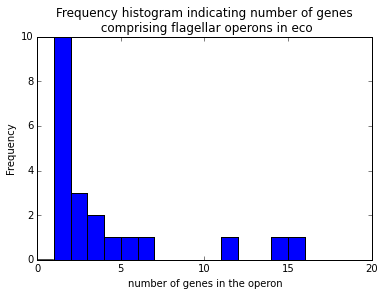

In [47]:
# Counting the number of genes in each of the flagellar operon (need to subtract 2 (flanking genes))
org_flagellarOperons = loadPkl('org_flagellarOperons.dict.pkl')
org = 'eco'
allOperons = org_flagellarOperons[org]
nbrData = list()
for operon in allOperons:
    nbrGenes = len(operon) - 2 # Flanking genes
    nbrData.append(nbrGenes)

print "Number of flagellar operons in Ecoli : ",len(nbrData)
plt.hist(nbrData,bins=range(20))
plt.xlabel('number of genes in the operon')
plt.ylabel('Frequency')
plt.title('Frequency histogram indicating number of genes \n comprising flagellar operons in %s'%(org))
plt.ylim([0,10])
plt.show()


In [49]:
"""
Drawing the operon layout for the flagellar genes
"""
baseLine = 0.5 

def drawHLine(ax,y=baseLine):
    ax.axhline(y=baseLine,color='black',lw=2)
    
def drawCutLine(ax,startx,dist=1):
    endx = startx + dist
    firstEnd = startx + dist/2
    xdata = np.arange(startx,endx+0.1,0.1)
    ydata = np.ones(len(xdata))*baseLine
    ax.plot(xdata,ydata,lw=3,color=(0.851,0.145,0.145))
    ax.text(x=firstEnd,y=baseLine,s='||')
    return ax,endx

def drawRectangle(ax,start,strand,length,percRGB=(0.9,0.6,0)):
    x = start
    y = baseLine
    width = length/redFactor
    if strand is '+': ht = 0.1
    else: ht = -0.1
    ax.add_patch(patches.Rectangle((x,y),width,ht,fc=percRGB))
    return ax,start+width

def saveFigure(fname):
    # Saving figure
    imgDir = '/home/jaggu/research/projectFiles/operons/tmpFigures/operonLayout'
    f = os.path.join(imgDir,fname)
    plt.savefig(f,dpi=300)

def drawOperonLayout(org,colorScheme='simple'):
    """
    Draws the flagellar operon layout of the organism. The coloring scheme is (a) simple - the genes are colored 
    orange that were mapped to the flagellar cog. (b) all - all the individual genes are given a coloring scheme. 
    """
    # Defining the figure
    fig,ax = plt.subplots(figsize=(20,5))
    
    allOperon = org_flagellarOperons[org]
    flagella_cogList = getCOGList(org_FlagellaPairs_dict[org])
    baseLine = 0.5
    drawHLine(ax,baseLine)

    # initializing the starting line
    startx = 0
    endx = dist

    for operon in allOperon:
        ax,endx = drawCutLine(ax,startx)
        for i,gene in enumerate(operon):
            loc,strand,l,pid,gname,ltag,code,cog,pdt = gene.split('\t')
            COG = correctCOG(cog,i)
            if COG in flagella_cogList:
                if colorScheme is 'simple': percRGB = (0.9,0.6,0)
            else:
                percRGB = (0.1,0.1,0.1)
            lpos,rpos = map(int,loc.split('..'))
            if i is 0: start = endx #For first gene, use the end of the prev cut line
            else: start = end + (lpos - prevrpos)/redFactor
            ax,end = drawRectangle(ax,start,strand,int(l),percRGB)
            prevrpos = rpos
        startx = end
    ax.set_xlim([0,end*1.01])
    ax.set_ylim([0.0,1.0])
    ax.set_xticks([])
    ax.set_yticks([])
    title = org + ' flagellar operons layout'
    ax.set_title(title)
    fname = org + '_operonLayout.simpleColor.svg'

    saveFigure(fname)
    plt.close()
    return True

org_flagellarOperons = loadPkl('org_flagellarOperons.dict.pkl')

redFactor = 1000
dist = 1

def test():
    org = 'hpg'
    drawOperonLayout(org)

def allOrg():
    for org in orgDict_orig.keys():
        print "Drawing Operons for organism : ",org
        drawOperonLayout(org)
allOrg()

Drawing Operons for organism :  eco
Drawing Operons for organism :  bsu
Drawing Operons for organism :  bhy
Drawing Operons for organism :  seo
Drawing Operons for organism :  rru
Drawing Operons for organism :  cjj
Drawing Operons for organism :  vfi
Drawing Operons for organism :  vch
Drawing Operons for organism :  pae
Drawing Operons for organism :  bbu
Drawing Operons for organism :  hpg
